# Model ekonomiczny cen mieszkań w województwach Podkarpackim, Lubelskim, Świętokrzyskim i Małopolskin 

Celem naszego projektu było stworzenie jak najdokładniejszego modelu ekonomicznego prognozującego ceny mieszkań w oparciu o dane zebrane ze strony Gratka.pl. <br>


[Linkt do strony](https://gratka.pl/nieruchomosci?utm_source=google&utm_medium=cpc&utm_campaign=Brand&utm_adgroup=Brand&utm_term=gratka%20pl&utm_placement=&gad_source=1&gclid=Cj0KCQjwlN6wBhCcARIsAKZvD5hMwd1STwd6Zf7mhIqdZIls0aFhRaw0uuD_s-9zMJz4tYSvBLDXT6AaAuD1EALw_wcB)

<br> 
Z racji na tworzenie modelu w oparciu o drzewa decyzyjne wykorzystaliśmy dużą ilość parametrów do wykonywania prognoz, używając tak naprawdę praktycznie każdej zebranej kolumny w której występowała jakakolwiek zmienność


### Wizualizacja, w celu przestawienia obszaru, na którym są mieszkania uwzględnione w naszym modelu

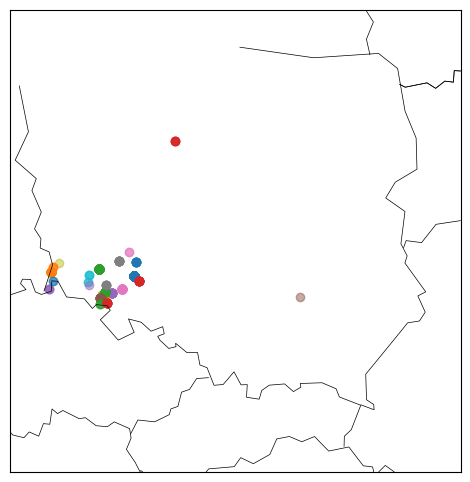

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Tworzenie wykresu
plt.figure(figsize=(10, 6))

# Inicjalizacja mapy Polski
map = Basemap(projection='merc', resolution='l', llcrnrlon=14, llcrnrlat=48, urcrnrlon=25, urcrnrlat=55)

# Rysowanie granic Polski
map.drawcountries()

# Rysowanie wybranych punktów
for cluster_label in np.unique(X_latlon["Cluster"]):
    cluster_data = X_latlon[X_latlon["Cluster"] == cluster_label]
    x, y = map(cluster_data["longitude"].values, cluster_data["latitude"].values)
    map.scatter(x, y, alpha=0.5)

# Wyświetlenie wykresu
plt.show()


### Wczywanie naszych danych 

Import biblioteki pandas służącej do wykonywania operacji na ramkach danych

In [49]:
import pandas as pd

Wczytanie zebranych danych dotyczących mieszkań 

In [50]:
df = pd.read_csv('zmodyfikowany_plik.csv')
df

,id,region,title,total_price,additional_price_per_m2,opis,Lokalizacja,Powierzchnia w m2,Liczba pokoi,Piętro,...,prysznic,komórka lokatorska,siła,strych,gimnazjum,tramwaj,lotnisko,metro,latitude,longitude
0,0,"Świdnica,",Mieszkanie Świdnica,279 000\n \n zł,"6 312,22 zł/m2",REZERWACJA! do sprzedania mieszkanie w Świdnic...,"Świdnica, ...","44,20 m2",3,4,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
1,1,"Świdnica,",Mieszkanie Świdnica,299 000\n \n zł,"4 456,04 zł/m2",do sprzedania mieszkanie znajdujące się w cent...,"Świdnica, ...","67,10 m2",2,1,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
2,2,"Świdnica,",Mieszkanie Świdnica,350 000\n \n zł,"7 142,86 zł/m2",Na sprzedaż lokal o powierzchni 49m2 + 9m2 ...,"Świdnica, ...",49 m2,2,parter,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
3,3,"Świdnica,",Mieszkanie Świdnica,494 000\n \n zł,"6 586,67 zł/m2",Do sprzedania dwupoziomowe mieszkanie w Świdni...,"Świdnica, ...",75 m2,3,3,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
4,4,"Świdnica,",Nowe mieszkanie Świdnica,399 975\n \n zł,"7 614,22 zł/m2",Przedstawiam Państwu słoneczne mieszkanie przy...,"Świdnica, ...","52,53 m2",3,parter,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,5955,"Bydgoszcz,","Nowe mieszkanie Bydgoszcz Fordon, ul. Akademicka",Zapytaj o cenę,NaN,O inwestycji Murapol Osiedle AkademickieNajważ...,"Bydgoszcz, ...","58,18 m2",4,4,...,prysznic,komórka lokatorska,siła,strych,gimnazjum,tramwaj,lotnisko,metro,53.129746,18.029370
5956,5956,"Bydgoszcz,","Nowe mieszkanie Bydgoszcz Fordon, ul. Akademicka",Zapytaj o cenę,NaN,O inwestycji Murapol Osiedle AkademickieNajważ...,"Bydgoszcz, ...","43,41 m2",2,4,...,prysznic,komórka lokatorska,siła,strych,gimnazjum,tramwaj,lotnisko,metro,53.129746,18.029370
5957,5957,"Bydgoszcz,","Nowe mieszkanie Bydgoszcz Fordon, ul. Akademicka",Zapytaj o cenę,NaN,O inwestycji Murapol Osiedle AkademickieNajważ...,"Bydgoszcz, ...","40,72 m2",2,4,...,prysznic,komórka lokatorska,siła,strych,gimnazjum,tramwaj,lotnisko,metro,53.129746,18.029370
5958,5958,"Bydgoszcz,","Nowe mieszkanie Bydgoszcz Fordon, ul. Akademicka",Zapytaj o cenę,NaN,O inwestycji Murapol Osiedle AkademickieNajważ...,"Bydgoszcz, ...","43,86 m2",2,4,...,prysznic,komórka lokatorska,siła,strych,gimnazjum,tramwaj,lotnisko,metro,53.129746,18.029370


## Wyciągniecie z kolumn najistotniejszych informacji

Czyszczenie ze zbędnych zanków zmiennych które będą wykorzystywane do tworzenia modelu

In [51]:
df['region'] = df['region'].str.replace(',', '')
df['total_price'] = df['total_price'].str.replace(r'\s+|\\n', '', regex=True)
df['total_price'] = df['total_price'].str.replace('zł', '')
df['additional_price_per_m2'] = df['additional_price_per_m2'].str.replace('zł/m2', '')
df['additional_price_per_m2'] = df['additional_price_per_m2'].str.replace(',', '.')
df['Powierzchnia w m2'] = df['Powierzchnia w m2'].str.replace(',', '.')
df['Powierzchnia w m2'] = df['Powierzchnia w m2'].str.replace(' m2', '')
df['Opłaty (czynsz administracyjny, media)'] = df['Opłaty (czynsz administracyjny, media)'].str.replace(' zł', '')

Zamiana typów danych z tekstowych na liczbowe oraz usunięcie braków danych

In [52]:
df['Liczba pokoi'] = pd.to_numeric(df['Liczba pokoi'], errors='coerce')
df.dropna(subset=['Liczba pokoi'], inplace=True)

df['Piętro'] = pd.to_numeric(df['Piętro'], errors='coerce')
df.dropna(subset=['Piętro'], inplace=True)

df['Liczba pięter w budynku'] = pd.to_numeric(df['Liczba pięter w budynku'], errors='coerce')
df.dropna(subset=['Liczba pięter w budynku'], inplace=True)

df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')
df.dropna(subset=['total_price'], inplace=True)

df['Powierzchnia w m2'] = pd.to_numeric(df['Powierzchnia w m2'], errors='coerce')
df.dropna(subset=['Powierzchnia w m2'], inplace=True)

df['Opłaty (czynsz administracyjny, media)'] = pd.to_numeric(df['Opłaty (czynsz administracyjny, media)'], errors='coerce')
df.dropna(subset=['Opłaty (czynsz administracyjny, media)'], inplace=True)

Podgląd ramki danych po wyczyszczeniu kolumn ze zmiennymi <br>

In [53]:
df.head()

,id,region,title,total_price,additional_price_per_m2,opis,Lokalizacja,Powierzchnia w m2,Liczba pokoi,Piętro,...,prysznic,komórka lokatorska,siła,strych,gimnazjum,tramwaj,lotnisko,metro,latitude,longitude
0,0,Świdnica,Mieszkanie Świdnica,279000.0,6 312.22,REZERWACJA! do sprzedania mieszkanie w Świdnic...,"Świdnica, ...",44.20,3.0,4.0,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
1,1,Świdnica,Mieszkanie Świdnica,299000.0,4 456.04,do sprzedania mieszkanie znajdujące się w cent...,"Świdnica, ...",67.10,2.0,1.0,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
3,3,Świdnica,Mieszkanie Świdnica,494000.0,6 586.67,Do sprzedania dwupoziomowe mieszkanie w Świdni...,"Świdnica, ...",75.00,3.0,3.0,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
5,5,Świdnica,"Nowe mieszkanie Świdnica, ul. Kosynierów",363146.0,7 050.01,Przedstawiam Państwu słoneczne mieszkanie przy...,"Świdnica, ...",51.51,3.0,2.0,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055
6,6,Świdnica,"Nowe mieszkanie Świdnica, ul. Kosynierów",278207.0,7 150.01,Przedstawiam Państwu mieszkanie przy ul. Kosyn...,"Świdnica, ...",38.91,2.0,1.0,...,prysznic,komórka lokatorska,siła,strych,NaN,NaN,NaN,NaN,50.842484,16.487055


# Tworzenie modelu
* #### wybór parametrów na podstawie, których będziemy przewidywać
* #### wybór co będziemy przewidywać

## Czynniki wpływające na cenę mieszkań, które bierzemy pod uwagę oraz powody naszego wyboru

* **Lokalizacj**
  * najistotniejszy warunek w wyborze mieszkania 
  * mieszkania w dużych miastach są droższe 
  * usytuowanie mieszkania w danym mieście też jest ważne


* **Liczba pokoi**: z ilu pokoi składa się mieszkanie
  *  Większe mieszkania mogą przyciągać inne rodzaje najemców, takie jak grupy współlokatorów, co może zwiększyć potencjalne dochody z najmu. 
  * Wzrastają koszty remontu każdy pokój trzeba wyposażyć w oświetlenie drzwi, potrzeba dużo więcej mebli 

* **Piętro**: na którym pietrze znajduje się mieszkanie 
  * zwykle nikt nie chce kupować mieszkan na **pierwszym piętrze: przechodnie widzą bardzo dobrze co robisz** w mieszkaniu oraz **ostatnim: lęk przed problemami z przeciekającym dachem** oraz wszelkimi problemami z nim związanymi
  * chodzenie po schodach może być uciążliwe

* **Powierzchnia w m²**
  * zwykle większe mieszkania są tańsze jeśli chodzi o cenę za metr 
  * różny typ klientów 

* **Rok budowy**
 * w zależności od roku budowy próbujemy określić stan budynku
 * to jak długo wytrzyma konstrukcja 
 * techniki stosowane w budownictwie 
 * to czy budynek jest zabytkiem i konserwator zabytków wyda zgodę na remont budynku

* **Typ zabudowy**
  * użyte materiały 
  * stylistyka budynku
  * trwałość budynku
  * użyte materiały i techniki
  * to czy na przykład sufit i ściany będą pękać na całej długości (zabudowa z wielkiej płyty)

* **Forma kuchni**
  * design mieszkania 
  * preferencje klientów 

* **Materiał budynku**
  * trwałość
  * izolację termiczną i akustyczną
  * wygląd zewnętrzny

* **Stan instalacji**
  * wymiana instalacji powoduje duże koszty 
  * potrzeba zatrudnienia elektryka oraz fachowców do przygotowania ścian 

* **Stan łazienki**
  * remont jest bardzo kosztowny 
  * prace są długie
  * mieszkanie jest praktycznie wyłączone z użytku podczas remontu

* **Okna**
  * wpływ na izolacje termiczną oraz akustykę

* **Forma własności**
  * problemy z mieszkaniami po postępowaniach sądowych w których mieszkają poprzedni lokatorzy, których nie mozna się pozbyc
  * zadłużenie mieszkania do spłacenia
  * hipoteka
  * mieszkanie z dużą liczbą współwłaścieli 

* **Głośność**
  * większość ludzi nie chce słyszeć co dzieje się w mieszkaniu obok lub odgłosów z ulicy

* **Usytuowanie względem stron świata**
  * to czy do mieszkania wpada dużo światła może zmniejszyć rachunki za prąd
  * niektórzy zwracają uwagę w jakich porach w jakich pomieszczeniach przebywają i czy będą mieli wtedy w nich światło słoneczne

* **Opłaty (czynsz administracyjny, media)**
 * każdy woli płacić jak najmniejsze


* **Miejsce parkingowe**
  * istotny atut mieszkania nawt dla osoby bez auta, która może podnajmować miejsce parkinowe innym

* **Stan**
  * ogólny stan mieszkania 
  * czy nadaje się do zamieszkania w stopniu zadowalającym


### Uważamy, że **lokalizacja jest najważniejszym czynnikiem** wpływającym na cenę mieszkania:
  * Dostępność do usług i udogodnień
  * Komunikacja
  * Bezpieczeństwo
  * Jakość życia
  * Potencjał wzrostu zawodowego
  * Możliwości




### Przypisanie zmiennych do tabeli X oraz tabeli y.
<br>
X to ramka zawierająca informacje dotyczące specyfikacji mieszkania oraz aspektów dotyczacych kwestii technicznych.
Y to ifnormacje dotyczące ceny mieszkania oraz roboczo usuwane później informacje dotyczące ceny za m<sup>2</sup>

In [54]:
X = df[['Liczba pokoi','Piętro','Powierzchnia w m2','Rok budowy',
       'Typ zabudowy', 'Liczba pięter w budynku','Forma kuchni', 'Materiał budynku', 'Stan instalacji','Stan łazienki','Okna','Forma własności','Głośność',
'Usytuowanie względem stron świata','Opłaty (czynsz administracyjny, media)','Miejsce parkingowe','Stan','Liczba miejsc parkingowych',
       'latitude', 'longitude']]
y = df[['total_price', 'additional_price_per_m2']]

**Wykorzystanie metody _OrdilaEncoding_** w celu szybkiego przekształcenie danych o wartościach tekstowych takich jak np materiał z którego zbudowany jest blok, na wartości liczbowe. <br>
Tym sposobem **uzyskujemy zmiennych kategorycznych z liczb**, które określają różne aspekty mieszkania oraz budynku, w którym znajduje się mieszkanie.

In [55]:
from sklearn.preprocessing import OrdinalEncoder

# Inicjalizacja kodera
enc = OrdinalEncoder()

# Przekształcenie i zastąpienie wartości dla kolejnych zmiennych
encoded_values1 = enc.fit_transform(X[['Typ zabudowy']])
encoded_values2 = enc.fit_transform(X[['Forma kuchni']])
encoded_values3 = enc.fit_transform(X[['Materiał budynku']])
encoded_values4 = enc.fit_transform(X[['Stan instalacji']])
encoded_values5 = enc.fit_transform(X[['Stan łazienki']])
encoded_values6 = enc.fit_transform(X[['Okna']])
encoded_values7 = enc.fit_transform(X[['Forma własności']])
encoded_values8 = enc.fit_transform(X[['Głośność']])
encoded_values9 = enc.fit_transform(X[['Miejsce parkingowe']])
encoded_values10 = enc.fit_transform(X[['Stan']])
encoded_values11 = enc.fit_transform(X[['Liczba miejsc parkingowych']])
encoded_values12 = enc.fit_transform(X[['Usytuowanie względem stron świata']])

# Zastąpienie kolumn oryginalnych zmiennych przekształconymi wartościami
X['Typ zabudowy'] = encoded_values1
X['Forma kuchni'] = encoded_values2
X['Materiał budynku'] = encoded_values3
X['Stan instalacji'] = encoded_values4
X['Stan łazienki'] = encoded_values5
X['Okna'] = encoded_values6
X['Forma własności'] = encoded_values7
X['Głośność'] = encoded_values8
X['Miejsce parkingowe'] = encoded_values9
X['Stan'] = encoded_values10
X['Liczba miejsc parkingowych'] = encoded_values11
X['Usytuowanie względem stron świata'] = encoded_values11

C:\Users\Szymon\AppData\Local\Temp\ipykernel_13828\2946108348.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Typ zabudowy'] = encoded_values1
C:\Users\Szymon\AppData\Local\Temp\ipykernel_13828\2946108348.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Forma kuchni'] = encoded_values2
C:\Users\Szymon\AppData\Local\Temp\ipykernel_13828\2946108348.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

### Czynności sprawdzające nasze dane

Usunięcie zmiennej określającej cenę za metr <sup>2<sup>

In [56]:
y = y.drop('additional_price_per_m2', axis=1)

Sprawdzenie czy wszystkie zmienne zawierają tylko wartości liczbowe

In [57]:
X.dtypes

Liczba pokoi                              float64
Piętro                                    float64
Powierzchnia w m2                         float64
Rok budowy                                  int64
Typ zabudowy                              float64
Liczba pięter w budynku                   float64
Forma kuchni                              float64
Materiał budynku                          float64
Stan instalacji                           float64
Stan łazienki                             float64
Okna                                      float64
Forma własności                           float64
Głośność                                  float64
Usytuowanie względem stron świata         float64
Opłaty (czynsz administracyjny, media)      int64
Miejsce parkingowe                        float64
Stan                                      float64
Liczba miejsc parkingowych                float64
latitude                                  float64
longitude                                 float64


Sprawdzenie ile unikalnych wartości znajduje się w kolumnie _region_ określającej miasto w którym znajduje się dane mieszkanie

In [58]:
unique_region_count = df['region'].nunique()
print(unique_region_count)

25


### Przygotowanie zmiennej mającej na celu poleprzenie dokładności przewidywań

Użycie nienadzorowanej metody uczenia maszynowego w celu przygotowania klasteryzacji. Tym sposobem na podstawie współrzędnych geograficznych przygotowujemy dodatkową zmienną która klasyfikuje dane mieszkanie w oparciu o współrzędne geograficzne

In [59]:
X_latlon = X[['latitude','longitude']]
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=unique_region_count)
X_latlon["Cluster"] = kmeans.fit_predict(X_latlon)
X_latlon["Cluster"] = X_latlon["Cluster"].astype("category")
X['Cluster'] = X_latlon['Cluster']

C:\Users\Szymon\AppData\Local\Temp\ipykernel_13828\2591646440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_latlon["Cluster"] = kmeans.fit_predict(X_latlon)
C:\Users\Szymon\AppData\Local\Temp\ipykernel_13828\2591646440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_latlon["Cluster"] = X_latlon["Cluster"].astype("category")
C:\Users\Szymon\AppData\Local\Temp\ipykernel_13828\2591646440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

### Kod dzielący na dane testowe i terningowe oraz model

Podział zbioru z danymi na dane testowe oraz treningowe. Treningowe użytych do stworzenia modelu odpowiedzialnego z późniejsze tworzenie prognoz dotyczaccyh cen mieszkań oraz testowe, na których następnie sprawdzamy jak dokładne są prognozy przygotowane przez model <br>
Następnie występuje import algorytmu uczenia maszynowego _RandomForrest_ wykorzystywanym przez nas następnie do obliczenia zalezności między ceną ze zmienney *y* oraz informacjami z tabeli *df*

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

sc=StandardScaler()
X=sc.fit_transform(X)
X=sc.transform(X)


from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=200, bootstrap=True)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

c:\Projekty\Typ_Z_Zarzondzania\Apartment\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Projekty\Typ_Z_Zarzondzania\Apartment\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Miara dokładności naszego modelu

Obliczenie przy pomocy zmiennej mean_absolute_error dokładności modelu wyliczając jak dokładne są jego przewidywania w oparciu o porównywanie przeprowadzanych obliczeń z danymi testowymi <br>
Na testowych danych z tabeli _X_ przeprowadzamy obliczenia i porównujemy je z wynikami z testowych danych _y_ <br>
Otrzymany przez nas wynik to **88** procent

In [61]:
from sklearn.metrics import mean_absolute_error
import statistics
mae = mean_absolute_error(predictions,y_test)
mean_total_price = statistics.mean(y['total_price'])
accuracy = 1 - mae/mean_total_price
print(accuracy)

0.8820165735800701
